<a href="https://colab.research.google.com/github/Leandro-Braga/Leandro-Braga/blob/main/estudo_ipca_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiramente, precisamos verificar se a série é estacionária; no caso da série do IPCA, verificamos que a série não é estacionária, e podemos confirmar fazendo o gráfico da função de autocorrelação (FAC) e função de autocorrelação parcial (FAC). Vamos relembrar a série da variação mensal do IPCA com ajuste sazonal:

In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

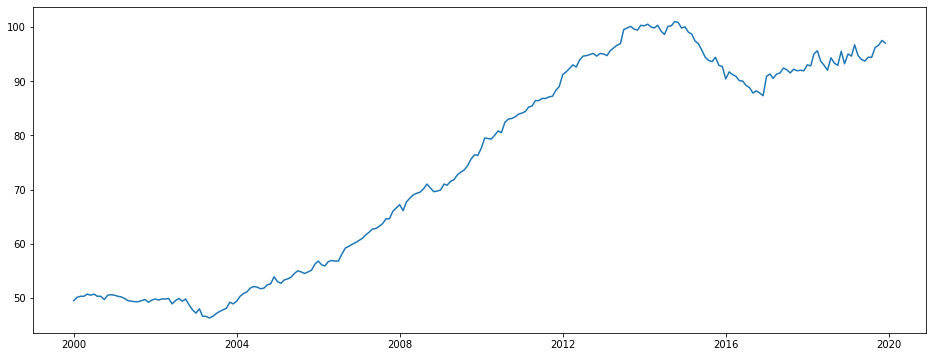

In [22]:
# importar o Excel para um dataframe
df = pd.read_excel('sample_data/ipca.xlsx' )
#Transformar da data em índice
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot(df)

Em seguida, rodamos o gráfico da função de autocorrelação (FAC) e função de autocorrelação parcial (FAC):

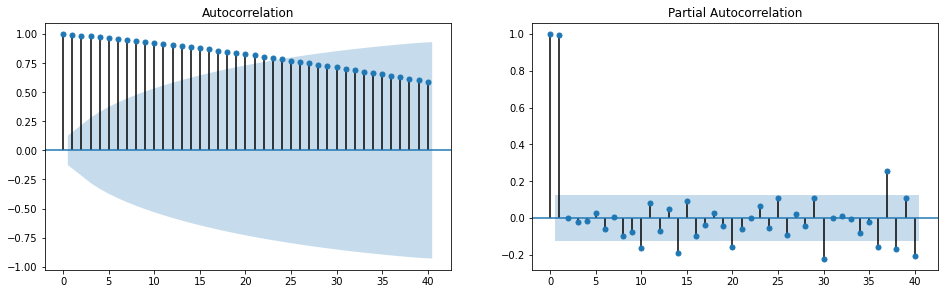

In [23]:
# Função de autocorrelação (FAC) e função de autocorrelação parcial (FAC)
def acf_pacf(x):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=40, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=40, ax=ax2)
acf_pacf(df)

Observa-se que a FAC decai exponencialmente como senoides amortecidas e a FACP possui o lag 1 significativo, ou seja, truncada no lag 1, o que sugere um modelo de médias móveis de ordem 1.

### Estimação

Na fase de estimação, utiliza-se o método dos momentos, ou seja, estimativas dos parâmetros de modelos ARMA simples, pois a diferença I do modelo ARIMA será feita antes.

Consiste em utilizar as expressões teóricas da FAC, que são funções dos coeficientes do modelo, substituir nessas fórmulas as estimativas das correlações, e resolver para os coeficientes. Determinamos os parâmetros do modelo, assim, estimaremos o modelo ARIMA(p,d,q), em que p=1, q=1 e d=1, sendo um ARIMA(1,1,1). No exemplo da série econômica do IPCA, vamos estimar um MA(1) da seguinte maneira:

In [25]:
#Ajuste do modelo ARIMA(0,0,1)

model = sm.tsa.ARMA(1000 * (df), (0,1)).fit()
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                  240
Model:                     ARMA(0, 1)   Log Likelihood               -2548.529
Method:                       css-mle   S.D. of innovations           9784.014
Date:                Sun, 23 Jan 2022   AIC                           5103.058
Time:                        16:33:38   BIC                           5113.500
Sample:                    01-01-2000   HQIC                          5107.265
                         - 12-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.452e+04   1260.498     59.120      0.000     7.2e+04     7.7e+04
ma.L1.Value     1.0000      0.011     90.125      0.000       0.978       1.022
                                    Roots       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Como podemos observar, tanto a constante quanto o coeficiente MA(1) são significativos, pois, P > |Z| são aproximadamente zero.

### Diagnóstico

Uma vez identificado e estimado um modelo, vamos ao diagnóstico. Nessa fase, devemos verificar se os resíduos apresentam as propriedades esperadas para eles. Ou seja, se eles se comportam como um ruído branco, isto é, não correlacionados com média zero e variância finita.

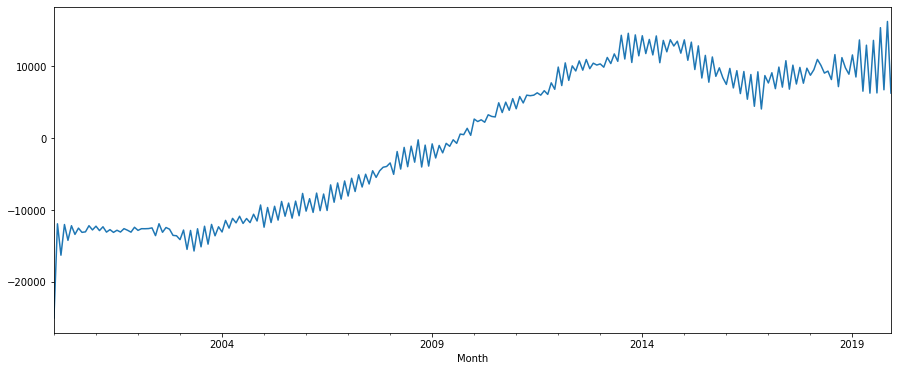

In [26]:
#Gráfico dos resíduos
model.resid.plot()

Os resíduos aparentemente são estacionários, ficam oscilando em torno de uma média zero, como deveria ser. Outro recurso para diagnosticar se o modelo é adequado é fazer a autocorrelação (ACF) e a autocorrelação parcial PACF para verificar se existe correlação dos resíduos:

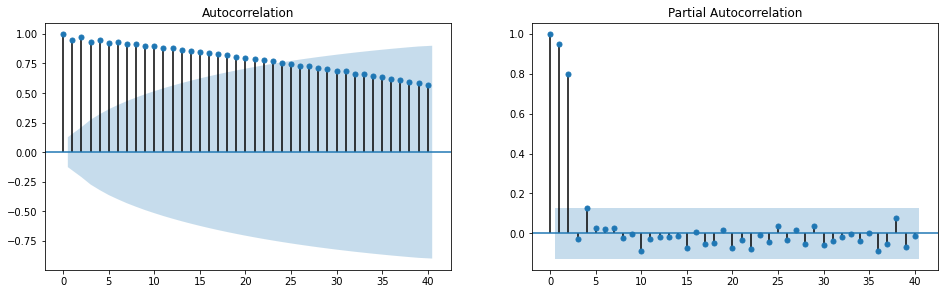

In [27]:
#ACF e PAF dos resíduos
acf_pacf(model.resid)

### Previsões

Como vimos, não há indícios de autocorrelação dos resíduos. Sendo assim, a série econômica da variação do IPCA com ajuste sazonal, entre 2000 até 2019 pode ser bem ajustada por um modelo MA(2).